<a href="https://colab.research.google.com/github/Spica08/deep-learning-from-scratch-5/blob/main/step3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# set up
import os
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [20]:
#データ準備
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# step3 多次元正規分布

## 3.1 Numpyと多次元配列

### 3.1.1 多次元配列
略

### 3.1.2 Numpyの多次元配列
略

### 3.1.3 要素ごとの演算
要素ごとの積 -> アダマール積($\bigodot$)

### 3.1.4 ベクトルの内積と行列積
略

## 3.2 多次元正規分布
step2で扱った正規分布は1つの実数値の分布を対象としていた。次に、複数の実数値であるベクトルに関する正規分布を考える。例えば、身長と体重を以下のようにベクトルとして扱う。  
$x = \begin{pmatrix}
   身長 \\
   体重
\end{pmatrix}$
これにより、Aさんは(170cm, 50kg)のように、各人の測定データが得られる。

### 3.2.1 多次元正規分布の式
ここでは、次の確率変数xを対象にする。  
$x = \begin{pmatrix}
   x_1 \\ x_2 \\ \vdots \\ x_D
\end{pmatrix}$  
xの各要素は、互いに関連するデータ(x1 = 身長、x2 = 体重、...)とする。このとき、xに関する正規分布は次の式で表される。  
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

ここで$\mu$は平均ベクトル
$\mu = \begin{pmatrix}
   \mu_1 \\ \mu_2 \\ \vdots \\ \mu_D
\end{pmatrix}$、$\sum$は共分散行列
$\sum = \begin{pmatrix}
   \sigma_{11}&\sigma_{12}&\dots&\sigma_{1D}\\
   \sigma_{21}&\sigma_{22}&\dots&\sigma_{2D}\\
   \vdots&\vdots&\ddots&\vdots \\
   \sigma_{11}&\sigma_{12}&\dots&\sigma_{1D}
\end{pmatrix}$を表す。

In [21]:
A = np.array([[1, 2, 3], [1, 3, 5], [2, 3, 5]])
## 転置
print("transpose")
print(A)
print(A.T)

## 行列式
print("determinant")
print(A)
print(np.linalg.det(A))

## 逆行列
print("inverse matrix")
print(A)
print(np.linalg.inv(A))

transpose
[[1 2 3]
 [1 3 5]
 [2 3 5]]
[[1 1 2]
 [2 3 3]
 [3 5 5]]
determinant
[[1 2 3]
 [1 3 5]
 [2 3 5]]
0.9999999999999989
inverse matrix
[[1 2 3]
 [1 3 5]
 [2 3 5]]
[[ 0. -1.  1.]
 [ 5. -1. -2.]
 [-3.  1.  1.]]


### 3.2.2 多次元正規分布の実装
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

In [22]:
# x : (D, 1) 列ベクトル
# mu : (D, 1) 列ベクトル
# cov : (D, D)
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [23]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


## 3.3 2次元正規分布の可視化

### 3.3.1 3Dグラフの描画方法

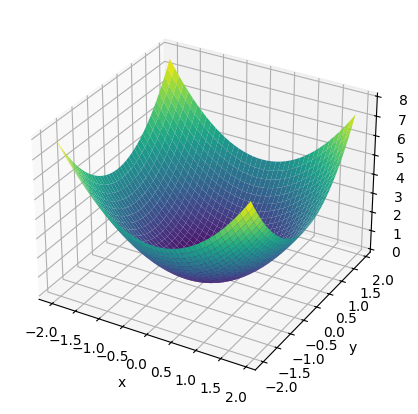

In [24]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(xs, ys)
z = X ** 2 + Y ** 2

fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = {"projection" : '3d'})
ax.plot_surface(X, Y, z, cmap = "viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.show()

### 3.3.2 等高線の描画

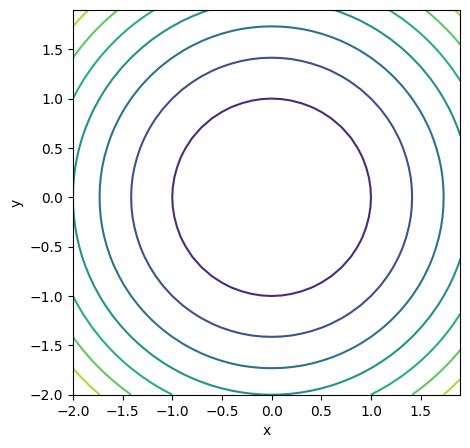

In [25]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(xs, ys)
z = X ** 2 + Y ** 2

fig, ax = plt.subplots(figsize = (5, 5))
ax.contour(X, Y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

### 3.3.3 2次元正規分布のグラフ

In [26]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])
xs = np.arange(-5, 5, 0.1)
ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

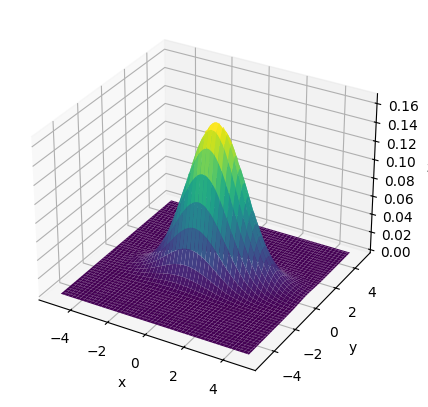

In [27]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = {"projection" : '3d'})
ax.plot_surface(X, Y, Z, cmap = "viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.show()

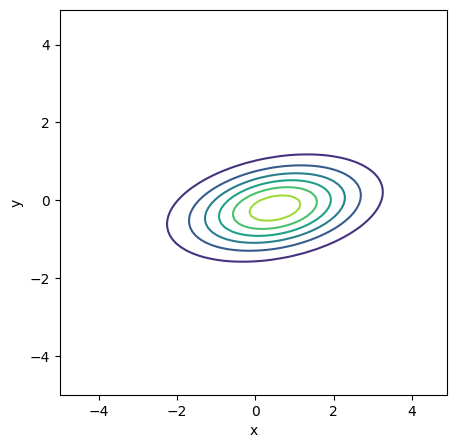

In [28]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.contour(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.show()

## 3.4 多次元正規分布の最尤推定

### 3.4.1 最尤推定を行う
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x - \mu)^T \sum\nolimits^{-1}(x - \mu) \right\rbrace}
\end{equation}

このD次元のベクトルxの正規分布からサンプル$D = \lbrace x^{(1)}, x^{(2)}, \dots, x^{(n)}\rbrace$が得られた場合を考える。この時このサンプルが得られる確率密度は、  
\begin{align}
p(D;\mu, \sum) &= \mathcal{N}(x^{(1)};\mu, \sum)\mathcal{N}(x^{(2)};\mu, \sum)\dots\mathcal{N}(x^{(N)};\mu, \sum) \\
               &= \prod_{n = 1}^{N}\mathcal{N}(x^{(n)};\mu, \sum)
\end{align}
と表される。この$p(D;\mu, \sum)$を最大にするパラメータを求めるが、計算の都合上対数尤度$L(\mu, \sum) = logp(D;\mu, \sum)$を考える。  
尤度が最大となる場所は、以下の式を解くことで求められる。  
\begin{equation}
\frac{\partial{L}}{\partial\mu} = 0  \\
\frac{\partial{L}}{\partial\sum} = 0
\end{equation}

\begin{align}
log p(D;\mu, \sum) &= log \prod_{n = 1}^{N}\mathcal{N}(x^{(n)};\mu, \sum) \\
                   &= log \prod_{n = 1}^{N}\frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= \sum_{n = 1}^{N}log\frac{1}{\sqrt{(2\pi)^D|\sum|}} exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= \sum_{n = 1}^{N}log\frac{1}{\sqrt{(2\pi)^D|\sum|}} + \sum_{n = 1}^{N}log exp{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= -Nlog{\sqrt{(2\pi)^D|\sum|}} + \sum_{n = 1}^{N}{\left\lbrace-\frac{1}{2}(x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
                   &= -\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}
\end{align}

#### 3.4.1.A $\mu$の最尤推定

##### 3.4.1.A.1 2次形式の微分
$\mu$の最尤推定に必要な以下の式の導出を行う。  
\begin{equation}
\frac{\partial}{\partial \mu}((x - \mu)^T\sum\nolimits^{-1}(x - \mu)) = -2\sum\nolimits^{-1}(x - \mu)
\end{equation}

まず、より単純な問題として2次形式$z^TAz$について考える(zは列ベクトルとする)。結果は1 x 1の行列(スカラー)となる。Aのi行j列目の要素を$A_{ij}$とすると、  
\begin{align}
z^TAz &= z^T(Az)\\
      &= \sum_{i = 1}^D z_i\begin{pmatrix}
                        \sum_{j = 1}^D a_{ij}z_j
                        \end{pmatrix}\\
      &= \sum_{i = 1}^D \sum_{j = 1}^D a_{ij}z_iz_j
\end{align}
ここで、$z_k$での微分を考えて、
\begin{align}
\frac{\partial}{\partial z_k}z^Tzx
      &= \frac{\partial}{\partial z_k}\sum_{i = 1}^D \sum_{j = 1}^D a_{ij}z_iz_j \\
      &= \sum_{i = 1}^D \sum_{j = 1}^D a_{ij}\left(\frac{\partial}{\partial z_k}z_i\right)z_j + \sum_{i = 1}^D \sum_{j = 1}^D a_{ij}z_i\left(\frac{\partial}{\partial z_k}z_j\right) \because 合成関数の微分\\
      &= \sum_{j = 1}^D a_{kj}z_j + \sum_{i = 1}^D a_{ik}z_i\\
      &= (Az + A^Tz)_k
\end{align}
従って、
\begin{align}
\frac{\partial}{\partial z}z^Tzx
      &= (Az + A^Tz)
\end{align}
Aが対称行列の時$A = A^T$より、
\begin{align}
\frac{\partial}{\partial z}z^TAz
      &= 2Az
\end{align}

よって、$(x - \mu) = z$とおいて、
\begin{equation}
\frac{\partial}{\partial \mu}\left((x - \mu)^T\sum^\nolimits{-1}(x - \mu)\right)\\
    = \frac{\partial}{\partial \mu}\left(z^T\sum^\nolimits{-1}z\right)
\end{equation}
ここで
\begin{align}
z &= (x - \mu)\\
\frac{\partial z}{\partial \mu} &= \frac{\partial}{\partial \mu} (x - \mu)\\
    &= -I \because ベクトルのベクトルによる微分
\end{align}
より、
\begin{align}
\frac{\partial}{\partial \mu}\left(z^T\sum^\nolimits{-1}z\right) &= \frac{\partial z}{\partial \mu} \frac{\partial}{\partial z}\left(z^T\sum^\nolimits{-1}z\right) \\
&= -I2Az\\
&= -2\sum^\nolimits{-1}(x - \mu)
\end{align}

##### 3.4.1.A.2 最尤推定
$\mu$に関する最尤推定を行う。
\begin{align}
L(\mu, \sum) &= -\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}
\end{align}
であることから、
\begin{align}
\frac{\partial}{\partial \mu} L(\mu, \sum) &= \frac{\partial}{\partial \mu} \left \lbrace-\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace} \right \rbrace\\
&= \frac{\partial}{\partial \mu} \left \lbrace -\frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace} \right \rbrace\\
&= -\frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace -2 \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\\
&= \sum\nolimits^{-1} \sum_{n = 1}^{N} (x^{(n)} - \mu)
\end{align}
これが0になるとき対数尤度が最大となるので(?)
\begin{align}
\sum\nolimits^{-1} \sum_{n = 1}^{N} (x^{(n)} - \mu) &= 0\\
\sum_{n = 1}^{N} (x^{(n)} - \mu) &= 0\\
\sum_{n = 1}^{N} \mu &= \sum_{n = 1}^{N} x^{(n)}\\
\mu &= \frac{1}{N}\sum_{n = 1}^{N} x^{(n)}\\
\end{align}
したがって、
\begin{equation}
\hat{\mu} = \frac{1}{N}\sum_{n = 1}^{N} x^{(n)}\\
\end{equation}

#### 3.4.1.B $\sum$の最尤推定

##### 3.4.1.B.1 必要な式の導出
$\sum$の最尤推定に必要な以下の式の導出を行う。  
\begin{equation}
\frac{\partial}{\partial \sum}\left(\sum_{n = 1}^N(x^{(n)} - \mu)^T\sum\nolimits^{-1}(x^{(n)} - \mu)\right) = -\left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right)^T
\end{equation}
ただし、
\begin{equation}
S = \sum_{n = 1}^N(x^{(n)} - \mu)(x^{(n)} - \mu)^T
\end{equation}
また、
\begin{equation}
\frac{\partial}{\partial \sum} log|\sum| = \left(\sum^\nolimits{-1}\right)^T
\end{equation}
\begin{equation}
\frac{\partial A^{-1}}{\partial x} = -A^{-1}\frac{\partial A}{\partial x}A^{-1}
\end{equation}
は認めるものとする。

まず、
\begin{align}
\sum_{n = 1}^N(x^{(n)} - \mu)^T\sum\nolimits^{-1}(x^{(n)} - \mu) &= \sum_{n = 1}^N tr((x^{(n)} - \mu)^T\sum\nolimits^{-1}(x^{(n)} - \mu)) \because スカラ\\
&= \sum_{n = 1}^N tr(\sum\nolimits^{-1}(x^{(n)} - \mu)(x^{(n)} - \mu)^T) \because tr(AB) = tr(BA)\\
&=tr\left(\sum_{n = 1}^N \sum\nolimits^{-1}(x^{(n)} - \mu)(x^{(n)} - \mu)^T \right) \because tr(AB) = tr(A) + tr(B)\\
&=tr\left(\sum\nolimits^{-1}S \right)
\end{align}
$\sigma_{ij}$に関する微分を考えると、
\begin{align}
\frac{\partial}{\partial \sigma_{ij}}\sum_{n = 1}^N(x^{(n)} - \mu)^T\sum\nolimits^{-1}(x^{(n)} - \mu) &= \frac{\partial}{\partial \sigma_{ij}}tr\left(\sum\nolimits^{-1}S \right)\\
&= tr\left(\frac{\partial}{\partial \sigma_{ij}}\sum\nolimits^{-1}S \right)\\
&= -tr\left(\sum\nolimits^{-1}\frac{\partial \sum}{\partial \sigma_{ij}} \sum\nolimits^{-1} S \right) \because \frac{\partial A^{-1}}{\partial x} = -A^{-1}\frac{\partial A}{\partial x}A^{-1}\\
&= -tr\left(\frac{\partial \sum}{\partial \sigma_{ij}} \sum\nolimits^{-1} S \sum\nolimits^{-1} \right)\\
&= -tr\left(\frac{\partial \sum}{\partial \sigma_{ij}} C \right) ← C = \sum\nolimits^{-1} S \sum\nolimits^{-1} \\
&= -C_{ji}
\end{align}
したがって、
\begin{align}
\frac{\partial}{\partial \sum}\sum_{n = 1}^N(x^{(n)} - \mu)^T\sum\nolimits^{-1}(x^{(n)} - \mu) &= -C^T\\
&= -\left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right)^T
\end{align}

##### 3.4.1.A.2 最尤推定
$\sum$に関する最尤推定を行う。
\begin{align}
L(\mu, \sum) &= -\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}
\end{align}
であることから、
\begin{align}
\frac{\partial}{\partial \sum} L(\mu, \sum) &= \frac{\partial}{\partial \sum} \left \lbrace-\frac{N}{2}log(2\pi)^D - \frac{N}{2}log{|\sum|} - \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace} \right \rbrace\\
&= \frac{\partial}{\partial \sum} \left \lbrace - \frac{N}{2}log{|\sum|} -\frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace} \right \rbrace\\
&=-\frac{\partial}{\partial \sum} \left \lbrace \frac{N}{2}log{|\sum|}\right \rbrace - \frac{\partial}{\partial \sum} \left \lbrace \frac{1}{2}\sum_{n = 1}^{N}{\left\lbrace (x^{(n)} - \mu)^T \sum\nolimits^{-1}(x^{(n)} - \mu) \right\rbrace}\right \rbrace\\
&= -\frac{N}{2}\left(\sum\nolimits^{-1}\right)^T + \frac{1}{2}\left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right)^T
\end{align}
これが0になる時を考えて、
\begin{align}
-\frac{N}{2}\left(\sum\nolimits^{-1}\right)^T + \frac{1}{2}\left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right)^T &= 0\\
N\left(\sum\nolimits^{-1}\right)^T &= \left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right)^T \\
N\left(\sum\nolimits^{-1}\right) &= \left(\sum\nolimits^{-1}S\sum\nolimits^{-1}\right) \\
N\sum &= S\\
\sum &= \frac{1}{N}S\\
\sum &= \frac{1}{N}\sum_{n = 1}^N(x^{(n)} - \mu)(x^{(n)} - \mu)^T\\
\end{align}
したがって、
\begin{equation}
\hat{\sum} = \frac{1}{N}\sum_{n = 1}^N(x^{(n)} - \hat{\mu})(x^{(n)} - \hat{\mu})^T
\end{equation}

以上より、多次元正規分布の最尤推定の結果は、
\begin{equation}
\hat{\mu} = \frac{1}{N}\sum_{n = 1}^{N} x^{(n)}\\
\end{equation}
\begin{equation}
\hat{\sum} = \frac{1}{N}\sum_{n = 1}^N(x^{(n)} - \hat{\mu})(x^{(n)} - \hat{\mu})^T
\end{equation}
と求められた。

### 3.4.2 最尤推定の実装
略

### 3.4.3 実データを使う

In [31]:
path = "/content/drive/MyDrive/datasets/SOCRdata/height_weight.txt"
xs = np.loadtxt(path)
print(xs.shape)

(25000, 2)


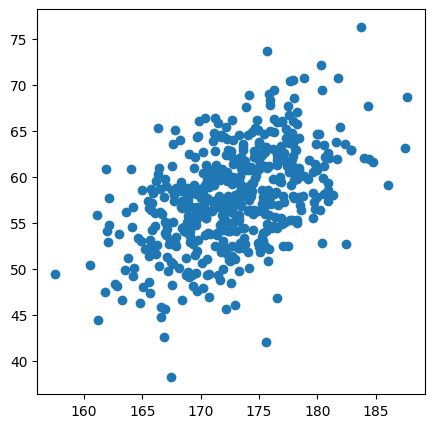

In [32]:
# 500データ使用
small_xs = xs[:500]
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(small_xs[:,0], small_xs[:, 1])
fig.show()

In [33]:
# 最尤推定
mu = np.mean(xs, axis = 0)
cov = np.cov(xs, rowvar = False) #各行を1つのデータとして扱う(変数 = column)
print(mu)
print(cov)

[172.70250854  57.6422088 ]
[[23.33145108 12.84736477]
 [12.84736477 27.97658708]]


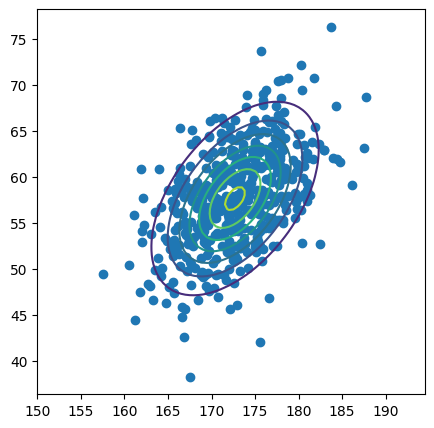

In [35]:
# plot
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(small_xs[:,0], small_xs[:, 1])
ax.contour(X, Y, Z)
fig.show()

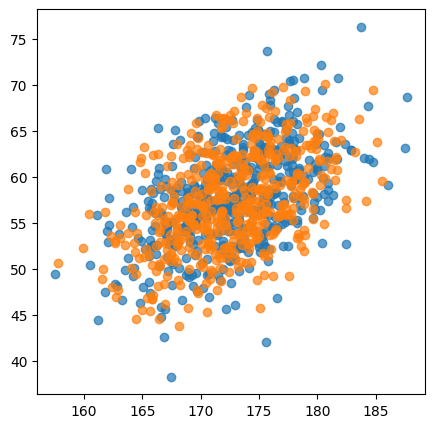

In [39]:
# データ生成
samples = np.random.multivariate_normal(mu, cov, 500)

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(small_xs[:,0], small_xs[:, 1], alpha = 0.7)
ax.scatter(samples[:,0], samples[:, 1], alpha = 0.7)
fig.show()